<a href="https://colab.research.google.com/github/Faiyazbhai/lab/blob/main/Weather_Update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
df = pd.read_csv('/Project 1 - Weather Dataset.csv')
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [6]:
df.isnull().sum()

,0
Date/Time,0
Temp_C,0
Dew Point Temp_C,0
Rel Hum_%,0
Wind Speed_km/h,0
Visibility_km,0
Press_kPa,0
Weather,0


In [7]:
df.dropna(inplace=True)
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [9]:
drop_cols = ['Temp_C', 'Press_kPa', 'Visibility_km']
df1 = df.drop(columns=drop_cols, axis=1)
df1

,Date/Time,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Weather
0,1/1/2012 0:00,-3.9,86,4,Fog
1,1/1/2012 1:00,-3.7,87,4,Fog
2,1/1/2012 2:00,-3.4,89,7,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-3.2,88,6,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-3.3,88,7,Fog
...,...,...,...,...,...
8779,12/31/2012 19:00,-2.7,81,30,Snow
8780,12/31/2012 20:00,-2.4,83,24,Snow
8781,12/31/2012 21:00,-1.5,93,28,Snow
8782,12/31/2012 22:00,-1.8,89,28,Snow


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# label encode the columns which have object type data
for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = le.fit_transform(df1[col])
df1

,Date/Time,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Weather
0,0,-3.9,86,4,7
1,11,-3.7,87,4,7
2,16,-3.4,89,7,9
3,17,-3.2,88,6,9
4,18,-3.3,88,7,7
...,...,...,...,...,...
8779,2794,-2.7,81,30,35
8780,2796,-2.4,83,24,35
8781,2797,-1.5,93,28,35
8782,2798,-1.8,89,28,35


In [16]:
import numpy as np
import pandas as pd

df1 = pd.read_csv("/Project 1 - Weather Dataset.csv")

df1['Churn'] = np.random.randint(0, 2, size=len(df1))

print(df1.head())


       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  Churn  
0            8.0     101.24                   Fog      1  
1            8.0     101.24                   Fog      0  
2            4.0     101.26  Freezing Drizzle,Fog      0  
3            4.0     101.27  Freezing Drizzle,Fog      0  
4            4.8     101.23                   Fog      1  


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
df1 = pd.read_csv("/Project 1 - Weather Dataset.csv")

# Add a churn column (example: random 0 or 1)
df1['Churn'] = np.random.randint(0, 2, size=len(df1))

# Define features (X) and target (y)
X = df1.drop('Churn', axis=1)
y = df1['Churn']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (7027, 8)
Test shape: (1757, 8)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X = df1.drop(['Churn', 'Date/Time'], axis=1)


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['Weather'] = le.fit_transform(X['Weather'])


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split again after fixing features
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale numeric values
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [26]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:

model = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=20, random_state=42)
}

Model: Decision Tree
Accuracy: 0.5025611838360843
Precision: 0.48268156424581005
Recall: 0.5124555160142349
F1 Score: 0.49712313003452246

Confusion Matrix:
[[451 463]
 [411 432]]

Model: K-Nearest Neighbors
Accuracy: 0.48434832100170744
Precision: 0.46503884572697
Recall: 0.4970344009489917
F1 Score: 0.4805045871559633

Confusion Matrix:
[[432 482]
 [424 419]]

Model: Random Forest
Accuracy: 0.5133750711439955
Precision: 0.49242424242424243
Recall: 0.4626334519572954
F1 Score: 0.47706422018348627

Confusion Matrix:
[[512 402]
 [453 390]]



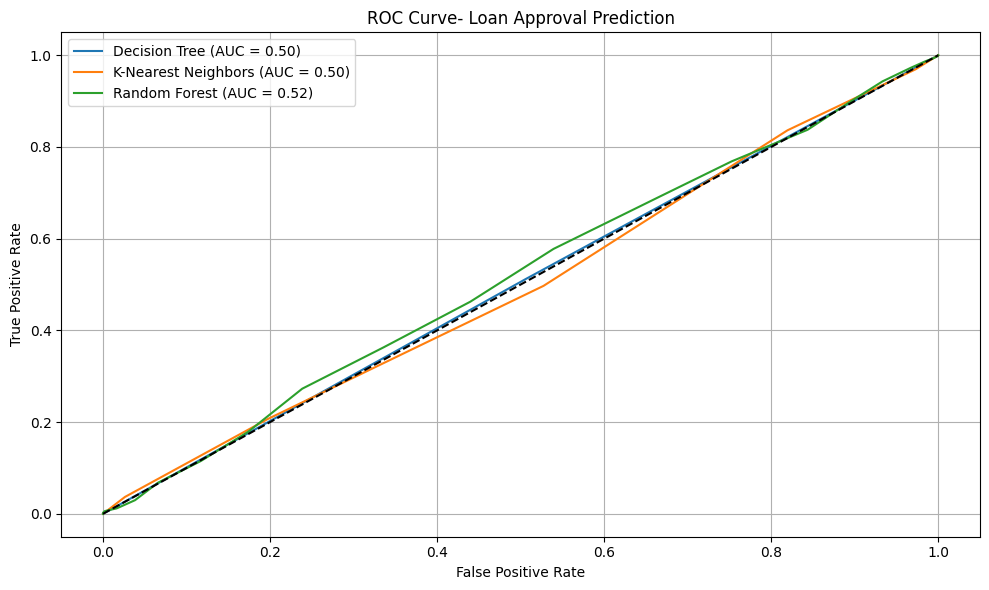

In [28]:
plt.figure(figsize=(10, 6))
for name, model in model.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}\n')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# ROC curve plotting for all 3 models
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve- Loan Approval Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()